# Interactive influence lines #

In [1]:
import sympy as sp

In [2]:
import numpy as np
import matplotlib.pylab as plt
from ipywidgets import widgets, interact

In [3]:
EI, x = sp.symbols('EI, x',real=True)

In [4]:
Bv, Cv, Cm = sp.symbols('Bv, Cv, Cm',real=True)
a, b, L1, L2 = sp.symbols('a, b, L1, L2',positive=True,real=True)
C1, C2, C3, C4 = sp.symbols('C1, C2, C3, C4')

# Find support reaction Av #

In [5]:
q = - Bv * sp.SingularityFunction(x,L1,-1) - Cv * sp.SingularityFunction(x,L1+L2,-1) + Cm * sp.SingularityFunction(x,L1+L2,-2) + 1 * sp.SingularityFunction(x,a,-1)
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3
w = sp.integrate(phi,x)+C4
eq1 = sp.Eq(V.subs(x,0),0)
eq2 = sp.Eq(M.subs(x,0),0)
eq3 = sp.Eq(w.subs(x,L1),0)
eq4 = sp.Eq(w.subs(x,L1+L2),0)
eq5 = sp.Eq(phi.subs(x,L1+L2),0)
eq6 = sp.Eq(M.subs(x,L1+L2+1),0)
eq7 = sp.Eq(V.subs(x,L1+L2+1),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7],[C1,C2,C3,C4,Bv, Cv, Cm])
V_sol = V.subs(sol)
V_subs = V_sol.subs([(L1,3),(L2,5),(a,2),(EI,5000)])
V_numpy = sp.lambdify([L1,L2,a,EI,x],V_sol.rewrite(sp.Piecewise))
M_sol = M.subs(sol)
M_subs = M_sol.subs([(L1,3),(L2,5),(a,2),(EI,5000)])
M_numpy = sp.lambdify([L1,L2,a,EI,x],M_sol.rewrite(sp.Piecewise))
Bv_sol = sol[Bv].rewrite(sp.Piecewise)
Bv_numpy = sp.lambdify([L1,L2,a,EI],Bv_sol)
Cv_sol = sol[Cv].rewrite(sp.Piecewise)
Cv_numpy = sp.lambdify([L1,L2,a,EI],Cv_sol)
Cm_sol = sol[Cm].rewrite(sp.Piecewise)
Cm_numpy = sp.lambdify([L1,L2,a,EI],Cm_sol)

In [6]:
def func(b):
    x = np.linspace(0,8,100)
    fig, axs = plt.subplots(2, 1, figsize=(7, 6))
    axs[0].plot([0,8],[0,0],color='black',linewidth=2)
    #axs[0].grid()
    axs[0].annotate(text='', xy=(3,0), xytext=(3,Bv_numpy(5,5,b,5000)), arrowprops=dict(arrowstyle='simple'))
    axs[0].annotate('%.2f kN' % Bv_numpy(5,5,b,5000),xy = [0.2,0.2])
    axs[0].annotate(text='', xy=(8,0), xytext=(8,Cv_numpy(5,5,b,5000)), arrowprops=dict(arrowstyle='simple'))
    #axs[0].annotate('%.2f kN' % Bv_numpy(5,b,5000),xy = [4.3,0.5])
    axs[0].annotate(text='', xy=(8,0), xytext=(8,Cm_numpy(5,5,b,5000)), arrowprops=dict(arrowstyle='simple'))
    axs[0].annotate(text='', xy=(b,0), xytext=(b,-1), arrowprops=dict(arrowstyle='simple'))
    axs[0].set_ylim([-1,1])
    axs[0].invert_yaxis()
    axs[0].axis('off')
    title0 = 'Free body diagram for unit load at $x_F = '+str(b)+'$'
    axs[0].set_title(title0)
    axs[1].plot([0,8],[0,0],color='black',linewidth=2)
    axs[1].grid()
    axs[1].axis('equal')
    axs[1].plot(x,Bv_numpy(3,5,x,5000),color='blue')
    axs[1].plot(b,Bv_numpy(3,5,b,5000),marker='o')
    axs[1].annotate('%.2f kN' % Bv_numpy(3,5,b,5000),xy = [b,Bv_numpy(3,5,b,5000)+0.4])
    axs[1].invert_yaxis()
    title1 = 'Influence line for support reaction at B'
    axs[1].set_title(title1)
    
interact(func, b = widgets.FloatSlider(min=0, max=8, value=2, step=0.2, description="Location unit load $x_F = $ ... (m)",readout_format='.1f',style= {'description_width': '180px'},layout = {'width': '400px'}) );

interactive(children=(FloatSlider(value=2.0, description='Location unit load $x_F = $ ... (m)', layout=Layout(…

## Find M-line ##

Piecewise((0, x > 8), ((3*x - 19)/10, x > 3), (2 - x, x > 2), (0, True))

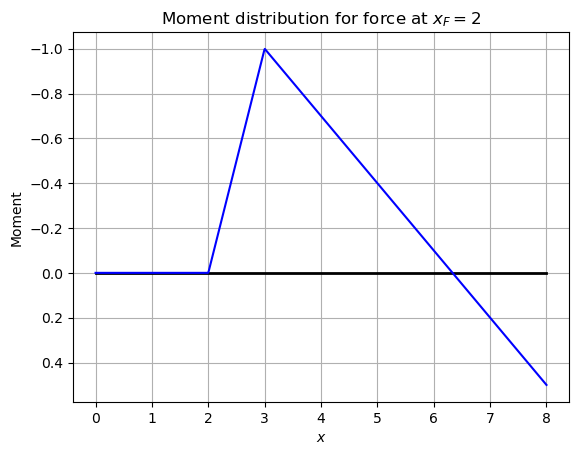

In [7]:
display(sp.simplify(M_subs.rewrite(sp.Piecewise)))
x_plot = np.linspace(0,8,1000)
plt.plot([0,8],[0,0],color='black',linewidth=2)
plt.plot(x_plot,M_numpy(L1=3,L2=5,a=2,EI=5000,x=x_plot),color="blue")
plt.xlabel('$x$')
plt.ylabel('Moment')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Moment distribution for force at $x_F =  2 $'
axs.set_title(title0);

##  Finding influence line for M ##

Piecewise((0, x > 8), ((x**3 - 19*x**2 + 112*x - 192)/100000, x > 3), ((21*x - 2*(x - 2)**3 - 61)/60000, x > 2), (19*(3159*x - 6319)/60000, True))

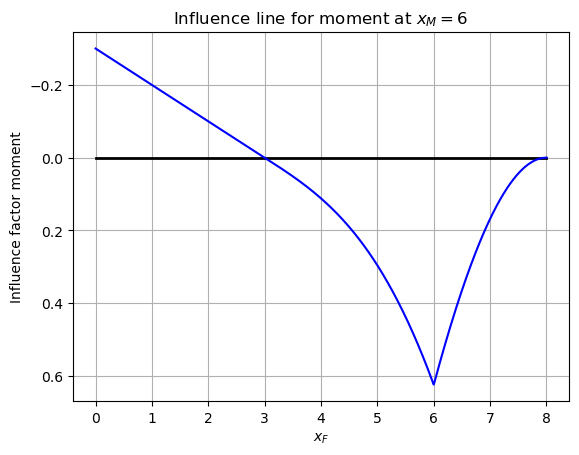

In [8]:
q = - Bv * sp.SingularityFunction(x,L1,-1) - Cv * sp.SingularityFunction(x,L1+L2,-1) + Cm * sp.SingularityFunction(x,L1+L2,-2) + 1 * sp.SingularityFunction(x,a,-1)
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3 - sp.SingularityFunction(x,a,0)
w = sp.integrate(phi,x)+C4
eq1 = sp.Eq(V.subs(x,0),0)
eq2 = sp.Eq(M.subs(x,0),0)
eq3 = sp.Eq(w.subs(x,L1),0)
eq4 = sp.Eq(w.subs(x,L1+L2),0)
eq5 = sp.Eq(phi.subs(x,L1+L2),0)
eq6 = sp.Eq(M.subs(x,L1+L2+1),0)
eq7 = sp.Eq(V.subs(x,L1+L2+1),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7],[C1,C2,C3,C4,Bv, Cv, Cm])
w_sol = w.subs(sol)
w_subs = w_sol.subs([(L1,3),(L2,5),(a,2),(EI,5000)])
display(sp.simplify(w_subs.rewrite(sp.Piecewise)))
M_inf_numpy = sp.lambdify([L1,L2,a,EI,x],w_sol.rewrite(sp.Piecewise))

x_plot = np.linspace(0,8,1000)
plt.plot([0,8],[0,0],color='black',linewidth=2)
plt.plot(x_plot,M_inf_numpy(L1=3,L2=5,a=6,EI=5000,x=x_plot),color="blue")
plt.xlabel('$x_F$')
plt.ylabel('Influence factor moment')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Influence line for moment at $x_M = 6$'
axs.set_title(title0);

## Comparison M-line and influence line for moment at $x = ...$ #

In [9]:
def func(a,b):
    x = np.linspace(0,10,100)
    fig, axs = plt.subplots(2, 1, figsize=(7, 6))
    axs[0].plot([0,10],[0,0],color='black',linewidth=2)
    axs[0].grid()
    axs[0].axis('equal')
    axs[0].plot(x,M_numpy(5,5,b,5000,x),color='blue')
    axs[0].plot(a,M_numpy(5,5,b,5000,a),marker='o')
    axs[0].annotate('%.2f kNm' % M_numpy(5,5,b,5000,a),xy = [a,M_numpy(5,5,b,5000,a)+0.5])
    axs[0].annotate(text='', xy=(b,0), xytext=(b,-1), arrowprops=dict(arrowstyle='simple'))
    axs[0].invert_yaxis()
    title0 = 'Moment distribution for force at $x_F = '+str(b)+'$, showing moment at $x_M = '+str(a)+'$'
    axs[0].set_title(title0)
    axs[1].plot([0,10],[0,0],color='black',linewidth=2)
    axs[1].grid()
    axs[1].axis('equal')
    axs[1].plot(x,M_inf_numpy(5,5,a,5000,x),color='blue')
    axs[1].plot(b,M_inf_numpy(5,5,a,5000,b),marker='o')
    axs[1].annotate('%.2f kNm' % M_inf_numpy(5,5,a,5000,b),xy = [b,M_inf_numpy(5,5,a,5000,b)+0.5])
    axs[1].invert_yaxis()
    title1 = 'Influence line for moment at $x_M = '+str(a)+'$'
    axs[1].set_title(title1)
    
interact(func, a = widgets.FloatSlider(min=0, max=10, value=2, step=0.2, description="Location moment $x_M =$ ... (m)",readout_format='.1f',style= {'description_width': '180px'},layout = {'width': '400px'}),
         b = widgets.FloatSlider(min=0, max=10, value=2, step=0.2, description="Location unit load $x_F = $ ... (m)",readout_format='.1f',style= {'description_width': '180px'},layout = {'width': '400px'}) );

interactive(children=(FloatSlider(value=2.0, description='Location moment $x_M =$ ... (m)', layout=Layout(widt…

# Find V-line #

Piecewise((-oo, Eq(x, 8)), (0, x > 8), (3/10, x > 3), (-1, x > 2), (0, True))

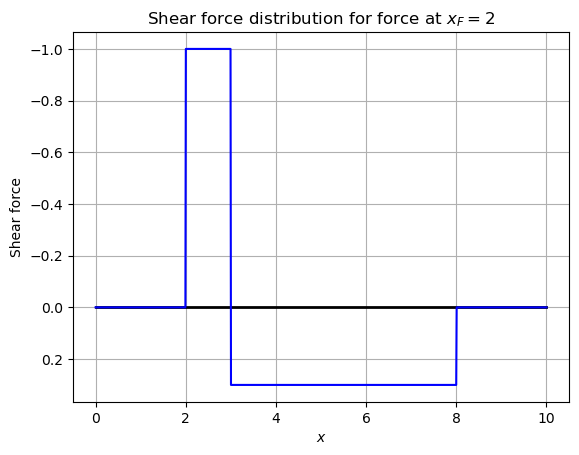

In [10]:
display(sp.simplify(V_subs.rewrite(sp.Piecewise)))

x_plot = np.linspace(0,10.00001,1000)
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.plot(x_plot,V_numpy(L1=3,L2=5,a=2,EI=5000,x=x_plot),color="blue")
plt.xlabel('$x$')
plt.ylabel('Shear force')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Shear force distribution for force at $x_F =  2 $'
axs.set_title(title0);

## Find influence line V ##

Piecewise((0, x > 8), ((x**3 - 19*x**2 + 112*x - 192)/100000, x > 3), ((21*x - 2*(x - 2)**3 - 61)/60000, x > 2), ((21*x - 60061)/60000, True))

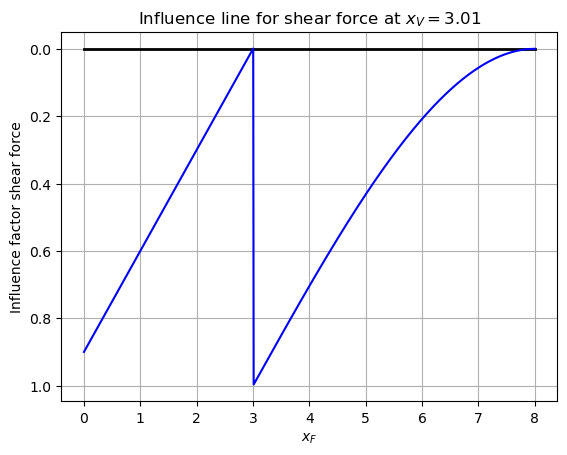

In [11]:
q = - Bv * sp.SingularityFunction(x,L1,-1) - Cv * sp.SingularityFunction(x,L1+L2,-1) + Cm * sp.SingularityFunction(x,L1+L2,-2) + 1 * sp.SingularityFunction(x,a,-1)
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3 
w = sp.integrate(phi,x)+C4 + sp.SingularityFunction(x,a,0)
eq1 = sp.Eq(V.subs(x,0),0)
eq2 = sp.Eq(M.subs(x,0),0)
eq3 = sp.Eq(w.subs(x,L1),0)
eq4 = sp.Eq(w.subs(x,L1+L2),0)
eq5 = sp.Eq(phi.subs(x,L1+L2),0)
eq6 = sp.Eq(M.subs(x,L1+L2+1),0)
eq7 = sp.Eq(V.subs(x,L1+L2+1),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7],[C1,C2,C3,C4,Bv, Cv, Cm])
w_sol = w.subs(sol)
w_subs = w_sol.subs([(L1,3),(L2,5),(a,2),(EI,5000)])
display(sp.simplify(w_subs.rewrite(sp.Piecewise)))
V_inf_numpy = sp.lambdify([L1,L2,a,EI,x],w_sol.rewrite(sp.Piecewise))

x_plot = np.linspace(0,8,1000)
plt.plot([0,8],[0,0],color='black',linewidth=2)
plt.plot(x_plot,V_inf_numpy(L1=3,L2=5,a=3.01,EI=5000,x=x_plot),color="blue")
plt.xlabel('$x_F$')
plt.ylabel('Influence factor shear force')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Influence line for shear force at $x_V = 3.01$'
axs.set_title(title0);

## Comparison V-line and influence line for shear force at $x = ...$ #

In [12]:
def func(a,b):
    x = np.linspace(0,10,200)
    fig, axs = plt.subplots(2, 1, figsize=(7, 6))
    axs[0].plot([0,10],[0,0],color='black',linewidth=2)
    axs[0].grid()
    axs[0].axis('equal')
    axs[0].plot(x,V_numpy(5,5,b,5000,x),color='blue')
    axs[0].plot(a,V_numpy(5,5,b,5000,a),marker='o')
    axs[0].annotate('%.2f kN' % V_numpy(5,5,b,5000,a),xy = [a,V_numpy(5,5,b,5000,a)+0.5])
    axs[0].annotate(text='', xy=(b,0), xytext=(b,-1), arrowprops=dict(arrowstyle='simple'))
    axs[0].invert_yaxis()
    title0 = 'Shear force distribution for force at $x_F = '+str(b)+'$, showing shear force at $x_V = '+str(a)+'$'
    axs[0].set_title(title0)
    axs[1].plot([0,10],[0,0],color='black',linewidth=2)
    axs[1].grid()
    axs[1].axis('equal')
    axs[1].plot(x,V_inf_numpy(5,5,a,5000,x),color='blue')
    axs[1].plot(b,V_inf_numpy(5,5,a,5000,b),marker='o')
    axs[1].annotate('%.2f kN' % V_inf_numpy(5,5,a,5000,b),xy = [b,V_inf_numpy(5,5,a,5000,b)+0.5])
    axs[1].invert_yaxis()
    title1 = 'Influence line for shear force at $x_V = '+str(a)+'$'
    axs[1].set_title(title1)
    
interact(func, a = widgets.FloatSlider(min=0, max=10, value=2, step=0.2, description="Location shear force $x_V$ = ... (m)",readout_format='.1f',style= {'description_width': '200px'},layout = {'width': '400px'}),
         b = widgets.FloatSlider(min=0, max=10, value=2, step=0.2, description="Location force $x_F$ = ... (m)",readout_format='.1f',style= {'description_width': '200px'},layout = {'width': '400px'}) );

interactive(children=(FloatSlider(value=2.0, description='Location shear force $x_V$ = ... (m)', layout=Layout…